In [67]:
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import plotly.express as px;

# specifying low_memory=False means to handle mixed types
df=pd.read_csv('HomicideWRTRegionsCountries.csv', low_memory=False)
df


,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


In [68]:
df.isnull().sum() #checks for null values in each column
# df.dropna (inplace=True) #removes null values from every column

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   195 non-null    object 
 1   Region     195 non-null    object 
 2   Subregion  195 non-null    object 
 3   Rate       195 non-null    float64
 4   Count      195 non-null    int64  
 5   Year       195 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ KB


In [70]:
df['Rate']=df['Rate'].astype(int) #converts the Rate column to int type

In [71]:
# for visualizations, we can use different df variables to sort, filter data, and then plot different graphs.
df['Rate']=df['Rate'].astype(int)
df['Region'].replace('Americas','America (North, South)', inplace=True)
# del df['Percentage']
df

C:\Users\Dell Latitude E5400\AppData\Local\Temp\ipykernel_6096\2039428706.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,"America (North, South)",South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [72]:
df1=df.sort_values('Count', ascending=False)
df1['Percentage'] = (df1['Count'] / df1['Count'].sum() * 100).round(2)
df1

,Location,Region,Subregion,Rate,Count,Year,Percentage
26,Brazil,"America (North, South)",South America,22,47722,2020,12.60
125,Nigeria,Africa,Western Africa,22,44200,2019,11.67
78,India,Asia,Southern Asia,3,40651,2020,10.73
111,Mexico,"America (North, South)",Central America,28,36579,2020,9.66
186,United States,"America (North, South)",Northern America,6,21570,2020,5.69
...,...,...,...,...,...,...,...
73,Holy See,Europe,Southern Europe,0,0,2015,0.00
112,Monaco,Europe,Western Europe,0,0,2015,0.00
84,Isle of Man,Europe,Northern Europe,0,0,2016,0.00
151,San Marino,Europe,Southern Europe,0,0,2011,0.00


In [73]:
df1=df[['Location','Count']].sort_values('Count',ascending=False).head(10) # countries with highest homicide count
df1

,Location,Count
26,Brazil,47722
125,Nigeria,44200
78,India,40651
111,Mexico,36579
186,United States,21570
162,South Africa,19846
118,Myanmar,15299
41,Colombia,11520
143,Russia,10697
190,Venezuela,10598


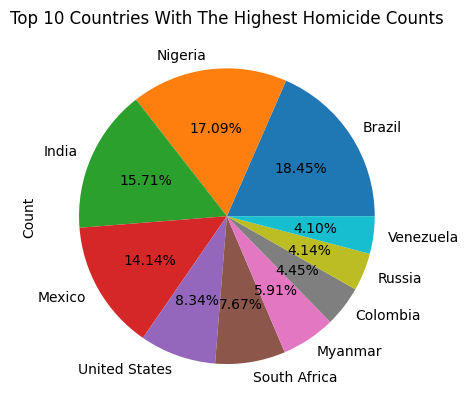

In [74]:
df1.plot(x='Location',y='Count',labels=df1.Location,kind='pie',legend=False, autopct='%1.2f%%',title='Top 10 Countries With The Highest Homicide Counts')
plt.show()

In [75]:
df2=df.groupby('Subregion').sum()['Count'].sort_values(ascending=False) # groups the homicide data count by subregion
df2

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int64

In [76]:
df2_unstacked=df2.to_frame() #.to_frame() converts the series into DataFrame (rows and columns). only works when your Series has a single-level index
df2_unstacked

,Count
Subregion,
South America,78872
Southern Asia,58631
Central America,47371
Western Africa,46318
South-Eastern Asia,25314
Eastern Africa,23669
Northern America,22317
Southern Africa,21479
Eastern Europe,14604


In [77]:
df2.index

Index(['South America', 'Southern Asia', 'Central America', 'Western Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Southern Africa', 'Eastern Europe', 'Western Asia', 'Eastern Asia',
       'Northern Africa', 'Caribbean', 'Middle Africa', 'Northern Europe',
       'Western Europe', 'Central Asia', 'Southern Europe',
       'Australia, New Zealand'],
      dtype='object', name='Subregion')

In [78]:
df2.values

array([78872, 58631, 47371, 46318, 25314, 23669, 22317, 21479, 14604,
       11638,  8563,  5538,  5037,  2477,  2097,  2075,  1406,  1093,
         347])

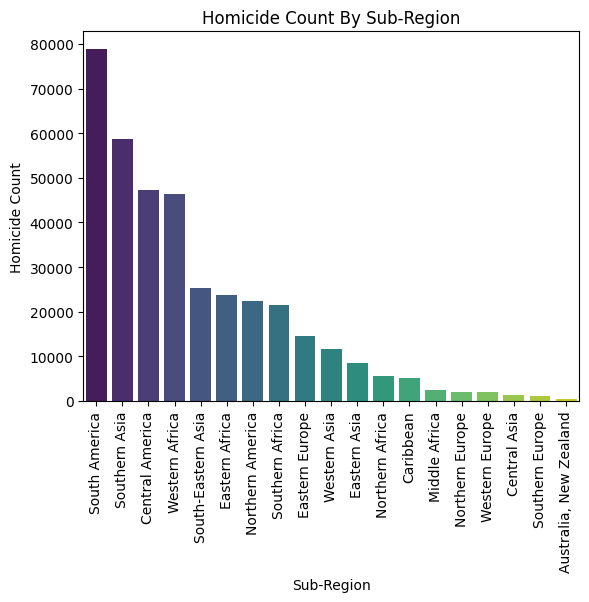

In [79]:
sns.barplot(x=df2.index, y=df2.values, hue= df2.index, palette='viridis')
plt.xticks(rotation=90)
plt.title('Homicide Count By Sub-Region')
plt.xlabel('Sub-Region')
plt.ylabel('Homicide Count')
xlabel=None

In [80]:
df3=df.groupby('Region').sum()['Count'].sort_values(ascending=False) # groups the homicide data count by region (continent)
df3

Region
America (North, South)    153597
Asia                      105552
Africa                     99481
Europe                     19869
Oceania                      347
Name: Count, dtype: int64

In [81]:
df3_unstacked=df3.to_frame() #.to_frame() converts the series into DataFrame (rows and columns). only works when your Series has a single-level index
df3_unstacked

,Count
Region,
"America (North, South)",153597
Asia,105552
Africa,99481
Europe,19869
Oceania,347


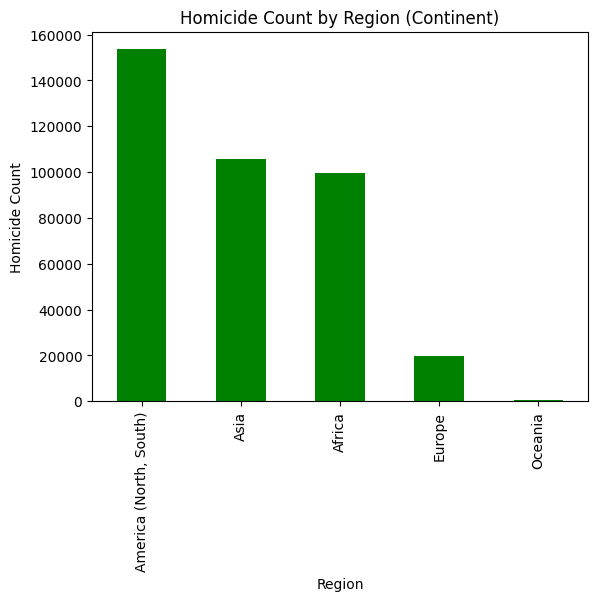

In [82]:
df3.plot(kind='bar', xlabel='Region', ylabel='Homicide Count', color='green',title='Homicide Count by Region (Continent)')
plt.show()

In [83]:
df.Year.value_counts()

Year
2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2011     5
2013     5
2014     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: count, dtype: int64

In [84]:
df4=df[['Year','Region','Count']]
df4=df4.groupby(['Year','Region']).sum().sort_values(by='Year',ascending=False) # groups the homicide data count by year and region (continent)
df4

Count
Year Region                        
2021 Asia                     15299
2020 Oceania                    221
     Europe                   15066
     America (North, South)  134784
     Africa                   28460
     Asia                     53516
2019 Asia                      6458
     America (North, South)    4276
     Africa                   44210
     Europe                     249
     Oceania                    126
2018 America (North, South)   13793
     Asia                     16923
     Europe                     883
2017 Asia                      1787
     Africa                    1467
     Europe                    3670
2016 Europe                       0
     America (North, South)     608
     Asia                       627
     Africa                    4987
2015 Asia                       241
     Africa                    2206
     Europe                       0
2014 America (North, South)      13
     Asia                      3029
2013 Asia                      5782
2012 Africa                   15264
     America (North, South)      53
     Asia                        61
2011 Africa                     855
     Asia                      1626
     Europe                       0
2010 Africa                     303
     Europe                       1
2009 Africa                      27
     America (North, South)      42
2008 Africa                    1702
2007 America (North, South)      26
2006 Asia                       203
     America (North, South)       2

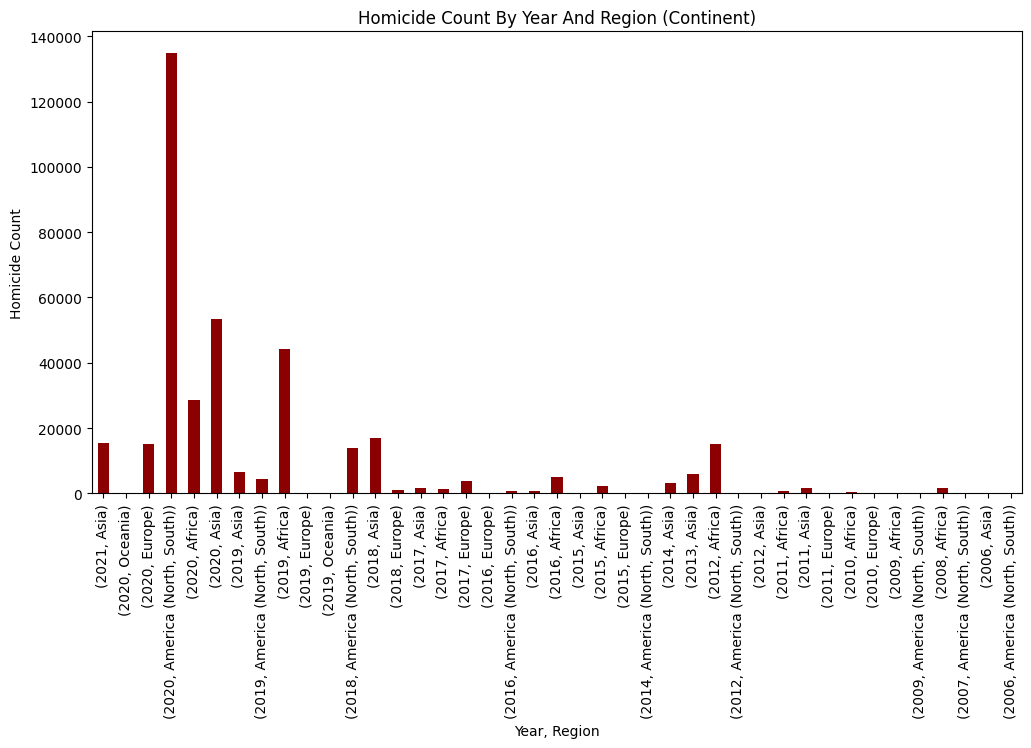

In [85]:
df4.plot(kind='bar',xlabel='Year, Region', ylabel='Homicide Count', title='Homicide Count By Year And Region (Continent)', color='darkred', legend=False, figsize=(12, 6))
plt.show()

# using seaborn for multindex values can be diifuclt, so we used pandas to plot the data

In [86]:
df5=df[(df['Region']=='Africa') | (df['Region']=='Asia') | (df['Region']=='Europe')]
df5

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
189,Uzbekistan,Asia,Central Asia,1,396,2019
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [87]:
df5=df5[df5['Year']>2016][['Region','Year','Count']]
df5

,Region,Year,Count
0,Asia,2018,2474
1,Europe,2020,61
2,Africa,2020,580
3,Europe,2020,2
8,Asia,2020,52
...,...,...,...
181,Africa,2020,4460
182,Europe,2017,2751
183,Asia,2019,64
184,Europe,2018,755


In [88]:
df5=df5.groupby(['Region','Year']).sum()['Count']
df5

Region  Year
Africa  2017     1467
        2019    44210
        2020    28460
Asia    2017     1787
        2018    16923
        2019     6458
        2020    53516
        2021    15299
Europe  2017     3670
        2018      883
        2019      249
        2020    15066
Name: Count, dtype: int64

In [89]:
df5_unstacked=df5.unstack(level=0) #.to_frame() converts the series into DataFrame (rows and columns). only works when your Series has a single-level index
df5_unstacked

Region,Africa,Asia,Europe
Year,,,
2017,1467.0,1787.0,3670.0
2018,NaN,16923.0,883.0
2019,44210.0,6458.0,249.0
2020,28460.0,53516.0,15066.0
2021,NaN,15299.0,NaN


In [90]:
df5_unstacked.index=df5_unstacked.index.astype(str) # converts the index to string type

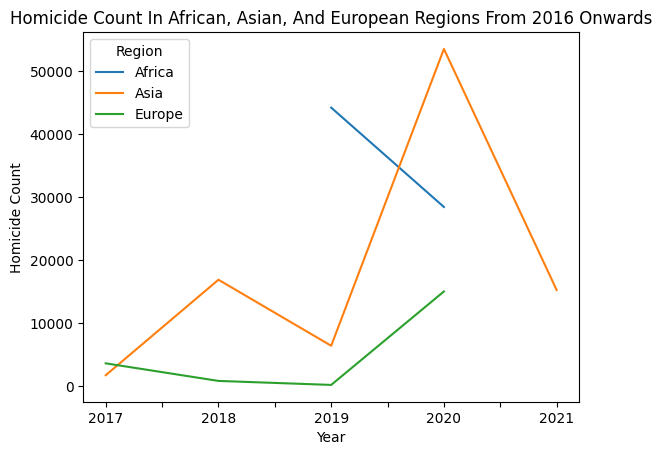

In [91]:
#wanted (desired) line plot for our case.
df5_unstacked.plot(kind='line', xlabel='Year', ylabel='Homicide Count', title='Homicide Count In African, Asian, And European Regions From 2016 Onwards') # line plot for the homicide count by by region and every year from 2016 onwards (if df5_unstacked is used)
plt.show()

In [92]:
# #uwanted (desired) line plot for our case
# df5.plot(kind='line') # line plot for the homicide count by region and year, but for only specific year per region (if df5)

In [93]:
df6=df.groupby(['Year']).sum()['Rate'] # groups the homicide data rate by year
df6

Year
2006     12
2007     19
2008      5
2009     36
2010     18
2011      8
2012    113
2013     20
2014     52
2015     55
2016     76
2017     27
2018     64
2019    153
2020    564
2021     28
Name: Rate, dtype: int64

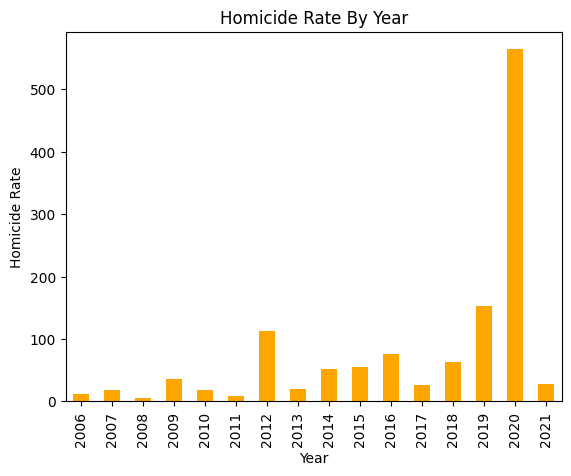

In [94]:
df6.plot(kind='bar', xlabel='Year', ylabel='Homicide Rate', title='Homicide Rate By Year', color='orange')
plt.show()

In [95]:
df7=df.groupby('Subregion')['Count'].mean().sort_values(ascending=False).round(2) # groups the homicide data count by subregion and calculates the mean
df7

Subregion
Southern Asia             6514.56
South America             6067.08
Central America           5921.38
Northern America          4463.40
Southern Africa           4295.80
Western Africa            4210.73
South-Eastern Asia        2531.40
Eastern Africa            1577.93
Eastern Europe            1460.40
Eastern Asia              1223.29
Northern Africa           1107.60
Middle Africa              619.25
Western Asia               581.90
Central Asia               281.20
Western Europe             230.56
Caribbean                  201.48
Australia, New Zealand     173.50
Northern Europe            139.80
Southern Europe             64.29
Name: Count, dtype: float64

In [96]:
df7.index

Index(['Southern Asia', 'South America', 'Central America', 'Northern America',
       'Southern Africa', 'Western Africa', 'South-Eastern Asia',
       'Eastern Africa', 'Eastern Europe', 'Eastern Asia', 'Northern Africa',
       'Middle Africa', 'Western Asia', 'Central Asia', 'Western Europe',
       'Caribbean', 'Australia, New Zealand', 'Northern Europe',
       'Southern Europe'],
      dtype='object', name='Subregion')

In [97]:
df7.values

array([6514.56, 6067.08, 5921.38, 4463.4 , 4295.8 , 4210.73, 2531.4 ,
       1577.93, 1460.4 , 1223.29, 1107.6 ,  619.25,  581.9 ,  281.2 ,
        230.56,  201.48,  173.5 ,  139.8 ,   64.29])

In [98]:
tree_data={
    'Sub-Region': df7.index,
    'Mean_Homicide_Count': df7.values,

}

df= pd.DataFrame(tree_data) # this will create a DataFrame from the tree_data dictionary
df


,Sub-Region,Mean_Homicide_Count
0,Southern Asia,6514.56
1,South America,6067.08
2,Central America,5921.38
3,Northern America,4463.40
4,Southern Africa,4295.80
5,Western Africa,4210.73
6,South-Eastern Asia,2531.40
7,Eastern Africa,1577.93
8,Eastern Europe,1460.40
9,Eastern Asia,1223.29


In [99]:
tree_visual=px.treemap(df,path=['Sub-Region'], values='Mean_Homicide_Count', title='Mean Homicide Count By Sub-Region (Treemap)')
tree_visual.update_traces(hovertemplate='Sub-Region: %{label}<br>Mean Homicide Count: %{value}')
tree_visual.show()